IMPORTING LIBRARIES

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

DATA EXPLORATION

In [127]:
Fraud=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Decision%20Tree/Fraud_check.csv')
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


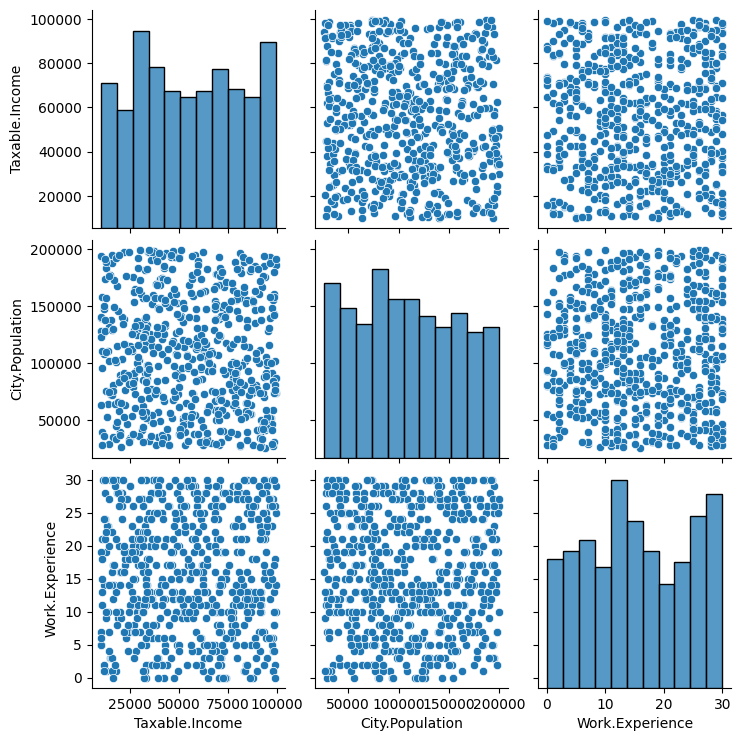

In [128]:
sns.pairplot(Fraud)
plt.show()

In [129]:
Fraud.shape

(600, 6)

In [130]:
Fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


PRE-PROCESSING

In [131]:
label_encoder = preprocessing.LabelEncoder()
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad'])
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status'])
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban'])

SPLITTING INTO X AND Y

In [132]:
x=Fraud.iloc[:,[0,1,3,4,5]]
y=Fraud.iloc[:,2]
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [133]:
y = Fraud[['Taxable.Income']]
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


FEATURE ENGINEERING

In [134]:
y['tax']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]

In [135]:
y=y.drop(["Taxable.Income"],axis=1)
y

,tax
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [136]:
y.head(100)

,tax
0,good
1,good
2,good
3,good
4,good
...,...
95,good
96,risky
97,good
98,risky


SPLITTING INTO TRAINING AND TESTING MODELS

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

BUILDING DECISION TREE

In [138]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

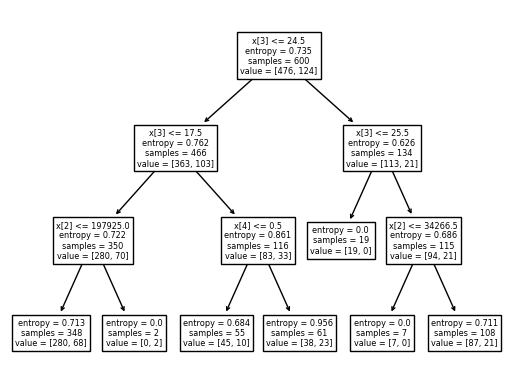

In [139]:
tree.plot_tree(model);

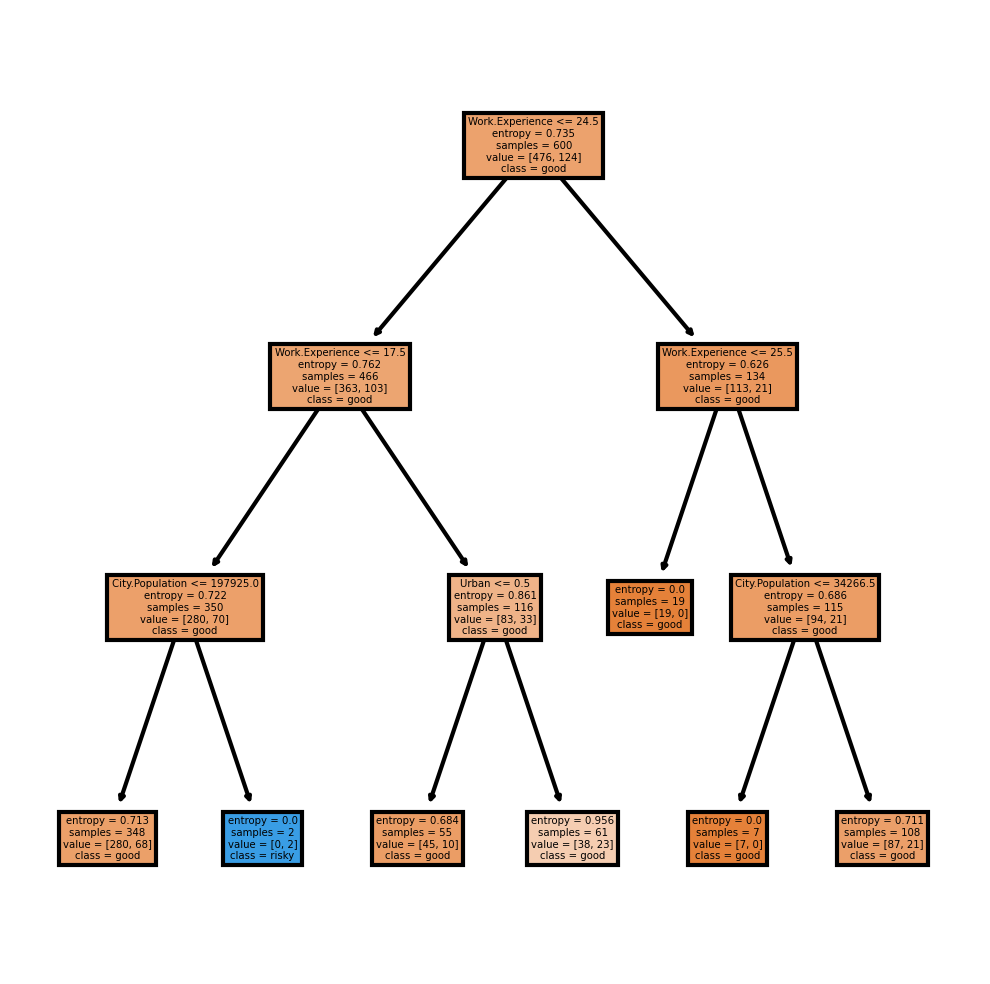

In [142]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);